In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

## 整理資料格式
CNN讀的是照片，所以不用把28*28的圖改成728

但是它需要rgb三層維度，或是使用灰階，使用灰階也要多宣告一個維度

In [5]:
x = x_train
x_train = x_train.reshape(60000,28,28,1)

In [6]:
x[1].shape

(28, 28)

In [7]:
x_train[0].shape

(28, 28, 1)

### one hot encoding

In [8]:
from keras.utils import np_utils

In [9]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [10]:
from keras.models import Sequential
from keras.layers import (Dense,
                          Activation,
                          Flatten,
                          Conv2D,
                          MaxPooling2D)
from keras.optimizers import Adam
#from keras.optimizers import SGD

## 建構神經網路

In [11]:
model = Sequential()

## 卷積、池化識別圖案特色
#### Conv2D -> relu -> MaxPooling2D
卷積 -> 激活 -> 池化

In [12]:
model.add(Conv2D(32,(3,3),padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))

In [13]:
model.add(MaxPooling2D(pool_size = (2,2)))
#model.add(Activation('sigmoid'))

In [14]:
model.add(Conv2D(64,(3,3),padding = 'same'))
model.add(Activation('relu'))

In [15]:
model.add(MaxPooling2D(pool_size = (2,2)))
#model.add(Activation('sigmoid'))

In [16]:
model.add(Conv2D(128,(3,3),padding = 'same'))
model.add(Activation('relu'))

In [17]:
model.add(MaxPooling2D(pool_size = (2,2)))
#model.add(Activation('sigmoid'))

## 轉到全連接層學習

In [18]:
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))

In [19]:
model.add(Dense(10))
model.add(Activation('softmax'))

## 組裝

In [20]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

Param = （輸入數據維度+1）* 神經元個數

32個3*3的 filter，會有9個維度、32個神經元

In [22]:
((3*3)+1)*32

320

In [23]:
model.fit(x_train,y_train,batch_size=100,epochs=12)

Epoch 1/12
600/600 [==============================] - 33s 55ms/step - loss: 0.6122 - accuracy: 0.8813
Epoch 2/12
600/600 [==============================] - 33s 55ms/step - loss: 0.1089 - accuracy: 0.9679
Epoch 3/12
600/600 [==============================] - 33s 55ms/step - loss: 0.0683 - accuracy: 0.9791
Epoch 4/12
600/600 [==============================] - 35s 58ms/step - loss: 0.0465 - accuracy: 0.9855
Epoch 5/12
600/600 [==============================] - 34s 57ms/step - loss: 0.0363 - accuracy: 0.9882
Epoch 6/12
600/600 [==============================] - 33s 55ms/step - loss: 0.0276 - accuracy: 0.9908
Epoch 7/12
600/600 [==============================] - 35s 58ms/step - loss: 0.0204 - accuracy: 0.9934
Epoch 8/12
600/600 [==============================] - 36s 60ms/step - loss: 0.0184 - accuracy: 0.9938
Epoch 9/12
600/600 [==============================] - 36s 60ms/step - loss: 0.0137 - accuracy: 0.9954
Epoch 10/12
600/600 [==============================] - 36s 59ms/step - loss: 0.011

In [24]:
score = model.evaluate(x_test.reshape(10000,28,28,1),y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0499 - accuracy: 0.9872


In [25]:
print('loss:',score[0])
print('acc:',score[1])

loss: 0.04991372674703598
acc: 0.9872000217437744


In [26]:
model_json = model.to_json()
open('cnn_write_architecture_test.json','w').write(model_json)
model.save_weights('cnn_write_weight_test.h5')

In [27]:
predict = model.predict_classes(x_test.reshape(10000,28,28,1))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
3
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1


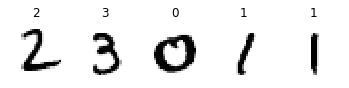

In [28]:
pick = np.random.randint(0,10000,5)

(x_train1,y_train1),(x_test1,y_test1)=mnist.load_data()


for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28),cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")
    print(y_test[pick[i]])
    print(y_test1[pick[i]])

2


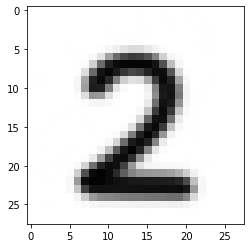

In [29]:
import cv2
# 以灰階的方式讀取圖檔
img_gray = cv2.imread('num.jpg', cv2.IMREAD_GRAYSCALE)
#cv2.IMREAD_COLOR     為預設值
#cv2.IMREAD_GRAYSCALE 以灰階的格式來讀取圖片。 
#cv2.IMREAD_UNCHANGED 讀取圖片中所有的 channels，包含透明度的 channel。
img_gray = img_gray*-1+255
plt.imshow(img_gray.reshape(28,28),cmap='Greys')
predict2 = model.predict_classes(img_gray.reshape(1,28,28,1))
print(predict2[0])